# Lab 03: Manipulate PyTorch Tensors - resizing and slicing

In [30]:
import torch

### Make a 10 x 2 matrix random matrix A. Then store its third row (index = 2) in to a vector v. Then store the first 5 rows (index 0 to index 4)  into a submatrix B. The important information is that B has a total of five rows. Print A, v and B.

In [31]:
A = torch.rand(10,2)
v = A[2]
B = A[0:5]

print(A)
print(v)
print(B)

tensor([[0.9481, 0.8472],
        [0.9485, 0.7872],
        [0.5169, 0.0539],
        [0.4674, 0.9406],
        [0.0683, 0.7038],
        [0.0483, 0.2186],
        [0.1618, 0.9780],
        [0.4928, 0.2415],
        [0.9376, 0.3111],
        [0.1378, 0.1851]])
tensor([0.5169, 0.0539])
tensor([[0.9481, 0.8472],
        [0.9485, 0.7872],
        [0.5169, 0.0539],
        [0.4674, 0.9406],
        [0.0683, 0.7038]])


### Extract entry (0,0) of the matrix A and store it into a PYTHON NUMBER x

In [32]:
x = A[0,0].item()

### Let's download 60,000 gray scale pictures as well as their label. Each picture is 28 by 28 pixels.

In [35]:

import torchvision.datasets
import torchvision.transforms as transforms

trainset = torchvision.datasets.MNIST(root='./data_mnist',
                                      train=True,
                                      download=True,
                                      transform=transforms.ToTensor()
                                      )

# Create two tensors containing all train data
data = trainset.data
label = trainset.targets


### Find the size of these two tensors

In [37]:
print(data.size())
print(label.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


### Print the first picture by slicing the data tensor. You will see the intensity of each pixel (a value between 0 and 255)

In [38]:
print(data[0])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

### The function show() will display the picture:

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Function to show an image tensor
def show(X):
    if X.dim() == 3 and X.size(2) == 3:
        plt.imshow(X.numpy())
        plt.show()
    elif X.dim() == 2:
        plt.imshow(   X.numpy() , cmap='gray'  )
        plt.show()
    else:
        print('WRONG TENSOR SIZE')

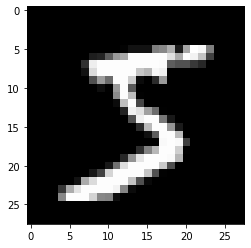

In [41]:
show(data[0])

### Print the first entry of the label vector. The label is 5 telling you that this is the picture of a five.

In [42]:
print(label[0].item())

5


### Display picture 20 of the dataset and print its label

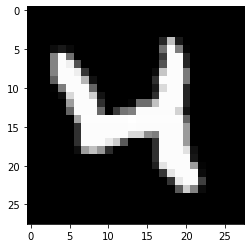

4


In [44]:
show(data[20])
print(label[20].item())

### Print the label corresponding to picture 10,000  10,001 10,002  10,003 and 10,004. So you need to extract 5 entries starting from entry 10,000.

In [47]:
print(label[10000:10000+5])

tensor([3, 8, 7, 9, 9])


### Display the two pictures that have label 9

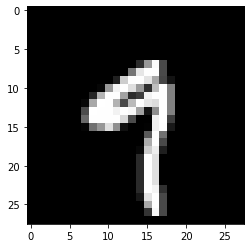

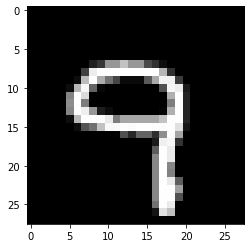

In [48]:
show(data[10003])
show(data[10004])

### Lets now play with the CIFAR data set. These are RGB pictures

In [49]:

trainset = torchvision.datasets.CIFAR10(root='./data_cifar10',
                                        train=True,
                                        download=True)

# Create two tensors containing all train data
data = torch.from_numpy(trainset.data)
label = torch.Tensor(trainset.targets)


Files already downloaded and verified


### Find the size of these two tensors. How many pictures? How many pixels? Note that it is a 4-dimensional Tensor. Dimension 0 gives you the index of the picture, the next two dimensions give the pixel location and the last dimension gives you the channel (R, G or B).



In [50]:
print(data.size())
print(label.size())

torch.Size([50000, 32, 32, 3])
torch.Size([50000])


### Extract the first picture (a 32 x 32 x 3 Tensor) and check its size.

In [52]:
print(data[0].size())

torch.Size([32, 32, 3])


### Display picture 7, 40 and 100 of the data set with utils.show() and print its label. For CIFAR, the label are:
0) Airplane  
1) Automobile   
2) Bird   
3) Cat   
4) Deer   
5) Dog    
6) Frog  
7) Horse   
8) Ship    
9) Truck

For example, a picture of a dog will have label 5.

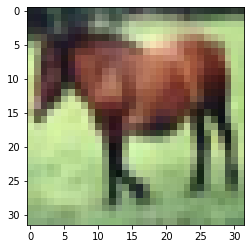

Horse


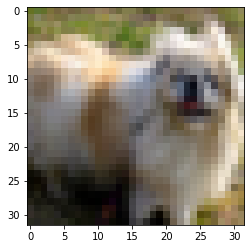

Dog


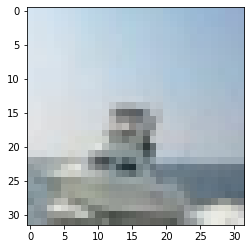

Ship


In [55]:
lbls = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
show(data[7])
print(lbls[int(label[7].item())])
show(data[40])
print(lbls[int(label[40].item())])
show(data[100])
print(lbls[int(label[100].item())])